# import the neccessary module and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import date
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tkinter
from tkinter import *
from PIL import ImageTk, Image
import string

data=pd.read_excel('Data.xlsx')
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,1863-02-26,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,NaT,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,NaT,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,3/3/2018,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,NaT,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,NaT,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,NaT,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,27/12/2017,Tickete Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,NaT,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,21/12/2017,Tickete Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,NaT,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,13/12/2017,Tickete Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,NaT,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,8/12/2017,Tickete Not Used,No,NaN,No


# Data preproccessing

# Generate Age

In [2]:
def calculateAge(birthdate):
    
    today = date.today()    
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))    
    return age

for index, row in data.iterrows(): 
    age=calculateAge(row['dateOfBirth'])
    
    if(age<14):      
        data.iloc[index,4]="Children"
        
    elif(age<25):      
        data.iloc[index,4]="Youth"
      
    elif(age<65):      
        data.iloc[index,4]="Adult"
        
    else:   
        data.iloc[index,4]="Senior"
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,Adult,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,3/3/2018,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,Adult,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,Youth,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,Adult,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,27/12/2017,Tickete Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,Adult,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,21/12/2017,Tickete Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,Adult,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,13/12/2017,Tickete Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,Adult,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,8/12/2017,Tickete Not Used,No,NaN,No


# Generate Quarter Number

In [3]:
df=data

for index, row in df.iterrows():   
    RDate=row['Tiketed_Date']   
    month=pd.to_datetime(RDate).month
    
    if(month<=3):  
        month=1
        
    elif(month<=6):
        month=2
        
    elif(month<=9):
        month=3
        
    else:
        month=4
        
    df.loc[df['Tiketed_Date'] == RDate,'Tiketed_Date']=month
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,2,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,Adult,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,2,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,1,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,Adult,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,1,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,Youth,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,1,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,Adult,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,4,Tickete Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,Adult,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,4,Tickete Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,Adult,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,4,Tickete Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,Adult,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,3,Tickete Not Used,No,NaN,No


# Data Cleaning

# Drop irrelevant column and clean data 

In [4]:
cols_to_drop=['miles','Rescheduled_Date','Date_of_Cancelation','title','Ticket First time Use','Rescheduled_Date','Refund Status','dateOfBirth']
df=data.drop(cols_to_drop,axis=1)
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status
0,M,Ethiopia,Adult,ET268,Economy Class,Tiketed,3/2/2018,2,Canceled
1,F,Liberia,Adult,ET268,Economy Class,Tiketed,9/2/2018,2,Canceled
2,M,Ethiopia,Adult,ET266,Economy Class,Tiketed,5/2/2018,1,Canceled
3,M,France,Adult,ET114,Economy Class,Tiketed,1/2/2018,1,Canceled
4,M,Ethiopia,Youth,ET114,Economy Class,Tiketed,6/2/2018,1,Canceled
...,...,...,...,...,...,...,...,...,...
1363,F,US,Adult,ET114,Economy Class,Tiketed,22/11/2017,4,Tickete Not Used
1364,M,Ethiopia,Adult,ET124,Economy Class,Tiketed,23/11/2017,4,Tickete Not Used
1365,F,Ethiopia,Adult,ET266,Economy Class,Tiketed,14/11/2017,4,Tickete Not Used
1366,M,Ethiopia,Adult,ET266,Economy Class,Tiketed,6/11/2017,3,Tickete Not Used


# Check missing value or null value

<AxesSubplot:>

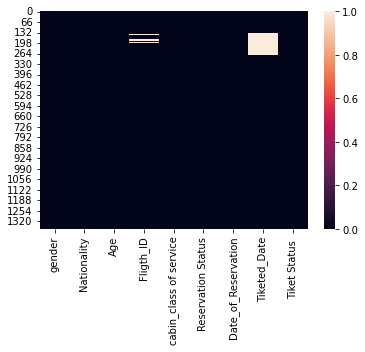

In [5]:
sb.heatmap(df.isnull())

# Filling Missing value

In [6]:
df["gender"].fillna(df['gender'].mode()[0], inplace = True)
df["Nationality"].fillna(df['Nationality'].mode()[0], inplace = True)
df["Age"].fillna(df['Age'].mode()[0], inplace = True)
df["Fligth_ID"].fillna(df['Fligth_ID'].mode()[0], inplace = True)
df["cabin_class of service"].fillna(df['cabin_class of service'].mode()[0], inplace = True)
df["Reservation Status"].fillna(df['Reservation Status'].mode()[0], inplace = True)
df["Date_of_Reservation"].fillna(df['Date_of_Reservation'].mode()[0], inplace = True)
df["Tiketed_Date"].fillna(df['Tiketed_Date'].mode()[0], inplace = True)

# Check missing value after handling missing value

<AxesSubplot:>

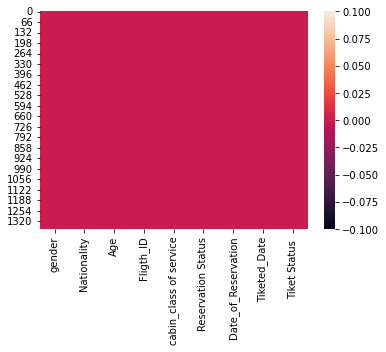

In [7]:
sb.heatmap(df.isnull())

# Data transformation 

# Modify and rename some attrbuite value 

In [8]:
df.loc[df['cabin_class of service'] == 'Economy Class','cabin_class of service']='Economy'
df.loc[df['cabin_class of service'] == 'Business Class','cabin_class of service']='Business'

df.loc[df['Nationality'] == 'Ethiopia','Nationality']='Local'
df.loc[df['Nationality'] != 'Local','Nationality']='Foreign'

df.loc[df['Tiket Status '] == 'Ticketed Used','Tiket Status ']='Tickete Used'
df.loc[df['Tiket Status '] == 'Canceled','Tiket Status ']='Tickete Not Used'
df.loc[df['Tiket Status '] == 'Not Ticketed','Tiket Status ']='Tickete Not Used'

# Convert Text categories in to numeric categories (Indexing)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical value to number 
le_Age=LabelEncoder()
le_gender=LabelEncoder()
le_nationality=LabelEncoder()
le_flightID=LabelEncoder()
le_cabinClass=LabelEncoder()
le_reservationStatus=LabelEncoder()
le_ticket_status=LabelEncoder()
le_ReservationDate=LabelEncoder()

df['N_Age']=le_Age.fit_transform(df['Age'])
df['N_Gender']=le_nationality.fit_transform(df['gender'])
df['N_Nationality']=le_nationality.fit_transform(df['Nationality'])
df['N_FlightID']=le_nationality.fit_transform(df['Fligth_ID'])
df['N_CabinClass']=le_nationality.fit_transform(df['cabin_class of service'])
df['N_ReservationStatus']=le_nationality.fit_transform(df['Reservation Status'])
df['N_TicketStatus']=le_nationality.fit_transform(df['Tiket Status '])
df['N_ReservationDate']=le_nationality.fit_transform(df['Date_of_Reservation'])

before_drop=df;
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_ReservationDate
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,2,Tickete Not Used,0,1,1,4,1,1,2,66
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,2,Tickete Not Used,0,0,0,4,1,1,2,93
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,1,Tickete Not Used,0,1,1,3,1,1,2,77
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,1,Tickete Not Used,0,1,0,0,1,1,2,3
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,1,Tickete Not Used,2,1,1,0,1,1,2,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,4,Tickete Not Used,0,0,0,0,1,1,2,41
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,4,Tickete Not Used,0,1,1,1,1,1,2,44
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,4,Tickete Not Used,0,0,1,3,1,1,2,17
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,3,Tickete Not Used,0,1,1,3,1,1,2,79


In [10]:
# pd.options.display.min_rows=300
# df

# Drop categorical value

In [11]:
cols_to_drop=['Age','gender','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiket Status ','Date_of_Reservation']
new_df=df.drop(cols_to_drop,axis=1)
new_df.head(10)

,Tiketed_Date,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_ReservationDate
0,2,0,1,1,4,1,1,2,66
1,2,0,0,0,4,1,1,2,93
2,1,0,1,1,3,1,1,2,77
3,1,0,1,0,0,1,1,2,3
4,1,2,1,1,0,1,1,2,81
5,1,2,1,1,0,1,1,2,3
6,1,0,0,1,1,1,1,2,66
7,1,0,0,1,4,1,1,2,63
8,1,0,0,1,4,1,1,2,0
9,1,0,1,1,0,1,1,2,63


# Modeling

# Split the Dataset in to training and test data set

In [12]:
from sklearn.model_selection import train_test_split

input_x=new_df[['N_Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','Tiketed_Date']]
target_y=new_df['N_TicketStatus']

x_train,x_test,y_train,y_test=train_test_split(input_x,target_y,test_size=0.3,random_state=0)


In [13]:
x_train

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,Tiketed_Date
592,2,0,0,4,1,3
1011,2,1,0,1,1,4
1244,0,1,1,4,1,3
1030,0,0,1,2,1,4
16,0,0,1,0,1,4
...,...,...,...,...,...,...
763,0,0,1,2,1,1
835,0,0,1,3,1,1
1216,0,0,1,3,1,4
559,0,1,0,3,1,4


In [14]:
x_test

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,Tiketed_Date
1039,0,1,1,3,1,4
1084,0,0,0,4,1,4
597,0,0,0,3,1,2
31,0,1,1,0,0,2
142,0,1,1,2,1,1
...,...,...,...,...,...,...
271,0,0,0,2,1,1
1262,0,1,1,3,0,3
1277,0,1,1,1,0,2
1038,0,1,1,4,1,4


# Build Decission Tree

In [15]:
from sklearn import tree

# Build
model=tree.DecisionTreeClassifier() 




# Train Data 

In [16]:
testY=model.fit(input_x,target_y)
value=model.score(x_train,y_train)
value

0.7962382445141066

# Test Data

In [17]:
predict=model.predict(x_test)
predictedValue=model.score(x_test,y_test)
predictedValue

0.8248175182481752

# Accuracy Test

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.8248175182481752

# Confusion matrix 

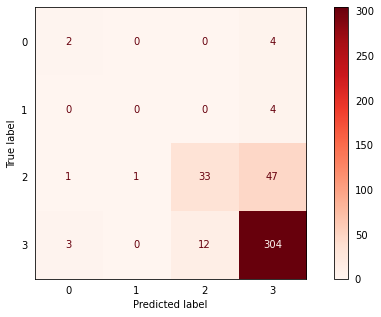

In [19]:
from sklearn.metrics import confusion_matrix

matrix=plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()
# confusion_matrix(y_test, predict)
# confusionchart(confusion_matrix(y_true, y_pred))
# correct=27+2+27+207+6
# incorrect=2+1
# total=274 #the total is y_test length
# accuray=correct/total


In [20]:
import numpy as np
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))
# 0 Exchanged
# 1 Refunded              
# 2 Tiketed  Not Used             
# 3 Tickete Used
# Accuracy=TP+TN/TP+TN+FP+FN
# Precision=TP/TP+TFP
# Recall=TP/TP+FN
# F1-Score= 2(precision*recall/precision+recall)


              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.00      0.00      0.00         4
           2       0.73      0.40      0.52        82
           3       0.85      0.95      0.90       319

    accuracy                           0.82       411
   macro avg       0.48      0.42      0.44       411
weighted avg       0.81      0.82      0.80       411



In [21]:
#new_df

In [22]:
df['N_TicketStatus'].value_counts()

3    1047
2     259
0      37
1      25
Name: N_TicketStatus, dtype: int64

In [23]:
before_drop['Tiket Status '].value_counts()

Tickete Used        1047
Tickete Not Used     259
Exchanged             37
Refunded              25
Name: Tiket Status , dtype: int64

# Aggregation and Report

# Gender with Ticket Status Aggregation

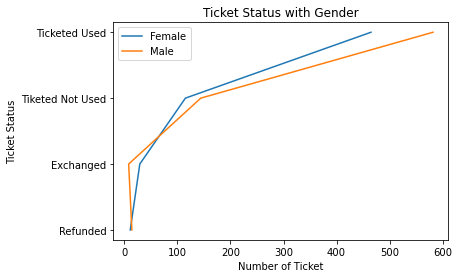

,Gender,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
0,Female,29,11,115,465
1,Male,8,14,144,582


In [24]:
genderTicketAggregated= before_drop.groupby(['Tiket Status ','gender'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=genderTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
genderDf = pd.DataFrame(columns=["Index","Gender","Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
genderDf[genderDf.columns[0]] = ["Female", "Male"]

test=[]
for index, row in result.iterrows():
    test.append(row[0])
    
j=0;
for i in range(len(test)):
    this_column = genderDf.columns[i+1]
    genderDf[this_column] = [test[j], test[j+1]]
    j=j+2
    
    if(i==3):
        break
        
genderDf.to_excel("GenderTicketStatusAggregationResult.xlsx",index=False)
genderTicket=pd.read_excel('GenderTicketStatusAggregationResult.xlsx')
genderTicketTranspose=genderTicket.T
genderTicketTranspose=genderTicketTranspose.iloc[1: , :]
sortedgenderTicket=genderTicketTranspose.sort_values([0])

x=[]
y=[]
zStatus=[]

for index, row in sortedgenderTicket.iterrows():
    x.append(row[0])
    y.append(row[1])
    zStatus.append(index)
    
plt.plot(x,zStatus)
plt.plot(y,zStatus)
 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Gender")
plt.legend(["Female","Male"])
plt.show()
genderTicket

# probability of female and male with regard to ticket status

In [25]:
genderTicketAggregated= before_drop.groupby(['Tiket Status ','gender'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=genderTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
genderDf = pd.DataFrame(columns=["Index","Gender","Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
genderDf[genderDf.columns[0]] = ["Female", "Male","probability"]
test=[]
test1=[]
totalFemale=0
totalMale=0

exchange=0
refunde=0
tused=0
tnotused=0
totalProb=[]
test=[]

for index, row in result.iterrows():
    test.append(row[0])
i=0;

for i in range(len(test)):
    exchange=test[i]+test[i+1]
    totalProb.append(exchange)
    refunde=test[i+2]+test[i+3]
    totalProb.append(refunde)
    tused=test[i+4]+test[i+5]
    totalProb.append(tused)
    tnotused=test[i+6]+test[i+7]
    totalProb.append(tnotused)
    break

i=0
for index, row in result.iterrows():
    if(i%2==0):
        totalFemale=row[0]+totalFemale
        
    else:
        totalMale=row[0]+totalMale
    i=i+1

for index, row in result.iterrows():
    if(i%2==0):
        test1.append((row[0]/totalFemale))
        
    else:
        test1.append((row[0]/totalMale))
    i=i+1
    
mergedData=[]
total=totalFemale+totalMale
j=0

for i in range(len(test)):
    if(j%2==0):
        mergedData.append(test[j]) 
        mergedData.append(test[j+1])
        
    else:
        mergedData.append((test[j] + test[j-1])/total)
    j=j+1
       
j=0
k=0
for i in range(len(mergedData)):
    this_column = genderDf.columns[i+1]
    genderDf[this_column] = [test1[k], test1[k+1],mergedData[j+2]]
    j=j+3
    k=k+2
    
    if(i==3):
        break

genderDf.to_excel("GenderTicketStatusAggregationResult.xlsx",index=False)
genderTicket=pd.read_excel('GenderTicketStatusAggregationResult.xlsx')
genderTicketTranspose=genderTicket.T
genderTicketTranspose=genderTicketTranspose.iloc[1: , :]
sortedgenderTicket=genderTicketTranspose.sort_values([0])
genderTicket

genderTicket

,Gender,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
0,Female,0.046774,0.017742,0.185484,0.750000
1,Male,0.010695,0.018717,0.192513,0.778075
2,probability,0.027047,0.018275,0.189327,0.765351


In [26]:
# before_drop

# Class of Service with Ticket Status Aggregation

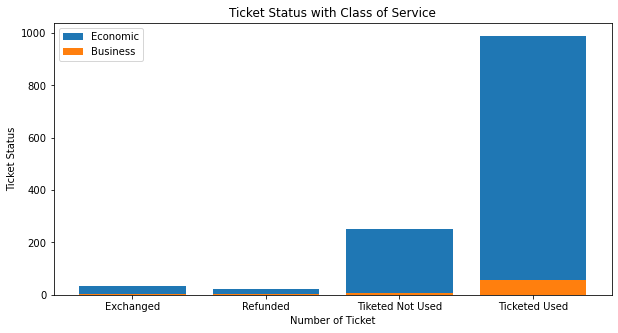

,Class,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
0,Business,2,2,7,58
1,Economic,35,23,252,989


In [27]:
classOfServiceTicketAggregated= before_drop.groupby(['Tiket Status ','cabin_class of service'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=classOfServiceTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
classDf = pd.DataFrame(columns=["Index","Class","Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
classDf[classDf.columns[0]] = ["Business", "Economic"]

test=[]
for index, row in result.iterrows():
    test.append(row[0])
    
j=0;
for i in range(len(test)):
    this_column = classDf.columns[i+1]
    classDf[this_column] = [test[j], test[j+1]]
    j=j+2
    
    if(i==3):
        break
        
classDf.to_excel("ClassOfServiceTicketStatusAggregationResult.xlsx",index=False)
classTicket=pd.read_excel('ClassOfServiceTicketStatusAggregationResult.xlsx')
classTicket
classTicketTranspose=classTicket.T
classTicketTranspose=classTicketTranspose.iloc[1: , :]
sortedclassTicket=classTicketTranspose.sort_values([0])

x=[]
y=[]
zStatus=[]

for index, row in sortedclassTicket.iterrows():
    x.append(row[0])
    y.append(row[1])
    zStatus.append(index)
    
fig = plt.figure(figsize = (10, 5))
plt.bar(zStatus,y)
plt.bar(zStatus,x) 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Class of Service")
plt.legend(["Economic","Business"])
plt.show()
classTicket

# probability of Business class and Economy class with regard to ticket status

In [28]:
classOfServiceTicketAggregated= before_drop.groupby(['Tiket Status ','cabin_class of service'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=classOfServiceTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
classDf = pd.DataFrame(columns=["Index","Class","Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
classDf[classDf.columns[0]] = ["Business", "Economic"]

secondData=[]
totalBusiness=0
totalEconomy=0

i=0
for index, row in result.iterrows():
    if(i%2==0):
        totalBusiness=row[0]+totalBusiness
        
    else:
        totalEconomy=row[0]+totalEconomy
    i=i+1

for index, row in result.iterrows():
    if(i%2==0):
        secondData.append((row[0]/totalBusiness))
        
    else:
        secondData.append((row[0]/totalEconomy))
    i=i+1
    

j=0;
for i in range(len(secondData)):
    this_column = classDf.columns[i+1]
    classDf[this_column] = [secondData[j], secondData[j+1]]
    j=j+2
    
    if(i==3):
        break

classDf

,Class,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
Index,,,,,
0,Business,0.028986,0.028986,0.101449,0.840580
1,Economic,0.026944,0.017706,0.193995,0.761355


# Nationality with Ticket Status Aggregation

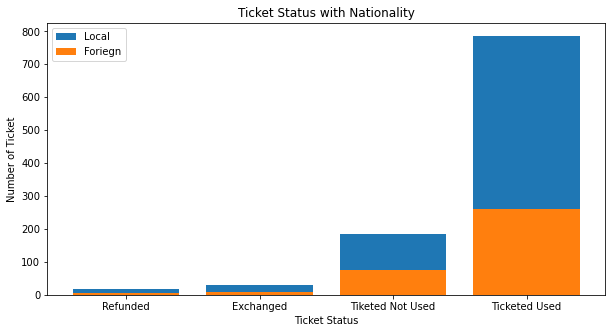

,Nationality,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
0,Foreign,8,6,74,261
1,Local,29,19,185,786


In [29]:
NationalityTicketAggregated= before_drop.groupby(['Tiket Status ','Nationality'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','cabin_class of service','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=NationalityTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
nationalityDf = pd.DataFrame(columns=["Index","Nationality", "Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
nationalityDf[nationalityDf.columns[0]] = ["Foreign", "Local"]
test=[]

for index, row in result.iterrows():
    test.append(row[0])
    
j=0;
for i in range(len(test)):
    this_column = nationalityDf.columns[i+1]
    nationalityDf[this_column] = [test[j], test[j+1]]
    j=j+2
    
    if(i==3):
        break
        
nationalityDf.to_excel("NationalityTicketStatusAggregationResult.xlsx",index=False)
nationalityTicket=pd.read_excel('NationalityTicketStatusAggregationResult.xlsx')
# nationalityTicket.T.sort_values(by=index,axis=1)
nationalityTranspose=nationalityTicket.T
nationalityTranspose=nationalityTranspose.iloc[1: , :]
sortedNationality=nationalityTranspose.sort_values([0])
xForeign=[]
yLocalcal=[]
zStatus=[]

for index, row in sortedNationality.iterrows():
    xForeign.append(row[0])
    yLocalcal.append(row[1])
    zStatus.append(index)
    
fig = plt.figure(figsize = (10, 5))
plt.bar(zStatus,yLocalcal)
plt.bar(zStatus,xForeign) 
plt.xlabel("Ticket Status")
plt.ylabel("Number of Ticket")
plt.title("Ticket Status with Nationality")
plt.legend(["Local","Foriegn"])
plt.show()
nationalityTicket

# probability of Foreign and Local with regard to ticket status

In [30]:
NationalityTicketAggregated= before_drop.groupby(['Tiket Status ','Nationality'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','cabin_class of service','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=NationalityTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
nationalityDf = pd.DataFrame(columns=["Index","Nationality", "Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
nationalityDf[nationalityDf.columns[0]] = ["Foreign", "Local"]

secondData=[]
totalForiegn=0
totalLocal=0

i=0
for index, row in result.iterrows():
    if(i%2==0):
        totalForiegn=row[0]+totalForiegn
        
    else:
        totalLocal=row[0]+totalLocal
    i=i+1

for index, row in result.iterrows():
    if(i%2==0):
        secondData.append((row[0]/totalForiegn))
        
    else:
        secondData.append((row[0]/totalLocal))
    i=i+1
    

j=0;
for i in range(len(secondData)):
    this_column = nationalityDf.columns[i+1]
    nationalityDf[this_column] = [secondData[j], secondData[j+1]]
    j=j+2
    
    if(i==3):
        break
        
nationalityDf

,Nationality,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
Index,,,,,
0,Foreign,0.022923,0.017192,0.212034,0.747851
1,Local,0.028459,0.018646,0.181551,0.771344


# Flight Number with Ticket Status Aggregation

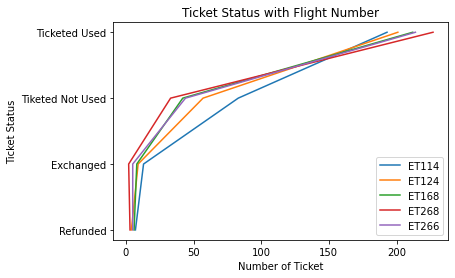

[13, 9, 8, 2, 5, 7, 4, 6, 3, 5, 83, 57, 42, 33, 44, 193, 201, 212, 227, 214]


,Flight Number,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
0,ET114,13,7,83,193
1,ET124,9,4,57,201
2,ET168,8,6,42,212
3,ET266,2,3,33,227
4,ET268,5,5,44,214


In [31]:
FlightNumberTicketAggregated= before_drop.groupby(['Tiket Status ','Fligth_ID'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','Nationality','cabin_class of service','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=FlightNumberTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
flightDf = pd.DataFrame(columns=["Index","Flight Number", "Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
flightDf[flightDf.columns[0]] = ["ET114", "ET124","ET168", "ET266","ET268"]

test=[]
for index, row in result.iterrows():
    test.append(row[0])   
j=0;

for i in range(len(test)):
    this_column = flightDf.columns[i+1]
    flightDf[this_column] = [test[j], test[j+1],test[j+2], test[j+3],test[j+4]]
    j=j+5
    
    if(i==3):
        break
        
flightDf.to_excel("FlightNumberTicketStatusAggregationResult.xlsx",index=False)
flightNumberTicket=pd.read_excel('FlightNumberTicketStatusAggregationResult.xlsx')
flightNumberTicket
flightNumberTicketTranspose=flightNumberTicket.T
flightNumberTicketTranspose=flightNumberTicketTranspose.iloc[1: , :]
sortedflightNumberTicket=flightNumberTicketTranspose.sort_values([0])
a=[]
b=[]
c=[]
d=[]
e=[]
zStatus=[]

for index, row in sortedflightNumberTicket.iterrows():
    a.append(row[0])
    b.append(row[1])
    c.append(row[2])
    d.append(row[3])
    e.append(row[4])
    zStatus.append(index)
    
plt.plot(a,zStatus)
plt.plot(b,zStatus)
plt.plot(c,zStatus)
plt.plot(d,zStatus)
plt.plot(e,zStatus)
 
plt.xlabel("Number of Ticket")
plt.ylabel("Ticket Status")
plt.title("Ticket Status with Flight Number")
plt.legend(["ET114","ET124","ET168","ET268","ET266"])
plt.show()
print(test)
flightNumberTicket


# Age Status with Ticket Status Aggregation

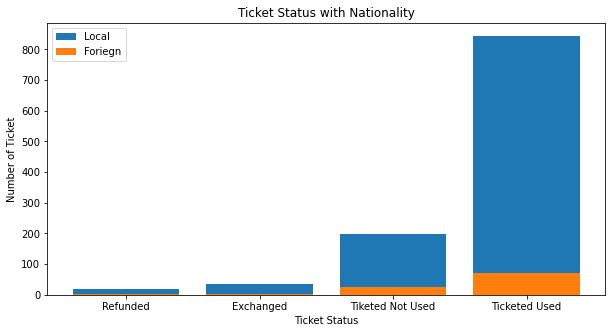

,Age,Exchanged,Refunded,Tiketed Not Used,Ticketed Used
0,Adult,35,19,197,844
1,Youth,1,1,25,72
2,Senior,1,5,37,131


In [32]:
AgeTicketAggregated= before_drop.groupby(['Tiket Status ','Age'],as_index=True).count()
tobedrop=['Fligth_ID','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_ReservationStatus','N_ReservationDate','Nationality','cabin_class of service','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=AgeTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
ageDf = pd.DataFrame(columns=["Index","Age", "Exchanged","Refunded","Tiketed Not Used","Ticketed Used"]).set_index('Index')
ageDf[ageDf.columns[0]] = ["Adult", "Youth","Senior"]

test=[]
for index, row in result.iterrows():
    test.append(row[0]) 
    
j=0;
for i in range(len(test)):
    this_column = ageDf.columns[i+1]
    ageDf[this_column] = [test[j], test[j+1],test[j+2]]
    j=j+3
    if(i==3):
        break
        
ageDf.to_excel("AgeTicketStatusAggregationResult.xlsx",index=False)
AgeTicket=pd.read_excel('AgeTicketStatusAggregationResult.xlsx')
AgeTicket
AgeTicketTranspose=AgeTicket.T
AgeTicketTranspose=AgeTicketTranspose.iloc[1: , :]
sortedAgeTicketTranspose=AgeTicketTranspose.sort_values([0])
xForeign=[]
yLocalcal=[]
zStatus=[]

for index, row in sortedAgeTicketTranspose.iterrows():
    xForeign.append(row[0])
    yLocalcal.append(row[1])
    zStatus.append(index)
    
fig = plt.figure(figsize = (10, 5))
plt.bar(zStatus,xForeign) 
plt.bar(zStatus,yLocalcal)
plt.xlabel("Ticket Status")
plt.ylabel("Number of Ticket")
plt.title("Ticket Status with Nationality")
plt.legend(["Local","Foriegn"])
plt.show()
AgeTicket

# Test prediction 

In [35]:

def pridictData(age,gender,nationality,flightNo,cabinClass,date):
    data=[]
    data.append(age) 
    data.append(gender)
    data.append(nationality)
    data.append(flightNo)
    data.append(cabinClass)
    data.append(date)
    result=model.predict([data])
    return result
    
# 'N_Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','Tiketed_Date'    
def dataPredictor():
    if(agemenu.get()=="Adult"):
        N_Age=0
        
    elif(agemenu.get()=="Sineor"):
        N_Age=1
        
    else:
        N_Age=1
    
    if(gendermenu.get()=="Female"):
        N_Gender=0
        
    else:
        N_Gender=1
        
    if(nationalitymenu.get()=="Foriegn"):
        N_Nationality=0
        
    else:
        N_Nationality=1   
    
    if(classmenu.get()=="Business"):
        N_CabinClass=0
        
    else:
        N_CabinClass=1 
    months=['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']
   
    i=1
    for month in months:
        if(month==monthmenu.get()):
            N_ReservationDate=i
        i=i+1
    flightNumbers=["ET114","ET124","ET168","ET268","ET266"]
   
    j=1
    for month in flightNumbers:
        if(month==flightNomenu.get()):
            N_FlightID=j
        j=j+1
        
# 0 Exchanged
# 1 Refunded              
# 2 Tiketed  Not Used             
# 3 Tickete Used

    result=pridictData(N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationDate)
    if(result[0]==0):
        lblMessege.config(text="The result shows that, this ticket will be Exchanged")
        
    elif(result[0]==1):
        lblMessege.config(text="The result shows that, this ticket will be Refunded")
        
    elif(result[0]==2):
        lblMessege.config(text="The result shows that, this ticket will be Tiket Not Used")
        
    else:
        lblMessege.config(text="The result shows that, this ticket will be Ticket used")
#     check if the text entry is empty or not
        
        
        
def ErrorMessage(message):
    
    lblError.config(text=message)


window = Tk()

window.title("Welcome to Ticket used prediction system ")

window.geometry('800x500')

lbl1 = Label(window, text="Let us predict the ticket status",font=(50),fg="green")

lbl1.grid(column=1, row=1,padx=10, pady=10)


agelbl = Label(window, text="Age",font=(12),fg="green")

agelbl.grid(column=0, row=4,padx=20, pady=10)

agelbl.grid(column=0, row=4,padx=20, pady=10)

agemenu= StringVar()
agemenu.set("Adult")
drop= OptionMenu(window, agemenu, "Adult", "Youth","Sineor")
drop.grid(row=4, column=1,padx=20, pady=10)
drop.config(width = 25)
drop.config(bg = "White")
drop.grid()


genderlbl = Label(window, text="Gender",font=(12),fg="green")

genderlbl.grid(column=0, row=5,padx=20, pady=5)

genderlbl.grid(column=0, row=5,padx=20, pady=5)

gendermenu= StringVar()
gendermenu.set("Male")
drop= OptionMenu(window, gendermenu, "Male", "Female")
drop.grid(row=5, column=1,padx=20, pady=10)
drop.config(width = 25)
drop.config(bg = "White")
drop.grid()



nationalitylbl = Label(window, text="Nationality",font=(12),fg="green")

nationalitylbl.grid(column=0, row=6,padx=20, pady=2)

nationalitylbl.grid(column=0, row=6,padx=20, pady=2)

nationalitymenu= StringVar()
nationalitymenu.set("Local")
drop= OptionMenu(window, nationalitymenu, "Local", "Foriegn")
drop.grid(row=6, column=1,padx=20, pady=10)
drop.config(width = 25)
drop.config(bg = "White")
drop.grid()


N_FlightIDlbl = Label(window, text="Flight ID",font=(12),fg="green")

N_FlightIDlbl.grid(column=0, row=7,padx=20, pady=2)

N_FlightIDlbl.grid(column=0, row=7,padx=20, pady=2)

flightNomenu= StringVar()
flightNomenu.set("ET114")
drop= OptionMenu(window, flightNomenu, "ET114","ET124","ET168","ET268","ET266")
drop.grid(row=7, column=1,padx=20, pady=10)
drop.config(width = 25)
drop.config(bg = "White")
drop.grid()


N_CabinClasslbl = Label(window, text="Cabin Class",font=(12),fg="green")

N_CabinClasslbl.grid(column=0, row=8,padx=20, pady=2)

N_CabinClasslbl.grid(column=0, row=8,padx=20, pady=2)

classmenu= StringVar()
classmenu.set("Economy")
drop= OptionMenu(window, classmenu, "Economy", "Business")
drop.grid(row=8, column=1)
drop.config(width = 25)
drop.config(bg = "White")
drop.grid()


N_ReservationDatelbl = Label(window, text="Reservation Month",font=(12),fg="green")

N_ReservationDatelbl.grid(column=0, row=9,padx=20, pady=2)

N_ReservationDatelbl.grid(column=0, row=9,padx=20, pady=2)

monthmenu= StringVar()
monthmenu.set("Quarter 1")
drop= OptionMenu(window, monthmenu, 'Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4')
drop.grid(row=9, column=1,padx=20, pady=10)
drop.config(width = 25)
drop.config(bg = "White")
drop.grid()


btn = Button(window, text="pridict",font=(12), command=dataPredictor, bg="green", fg="white")

btn.grid(column=1, row=10,padx=0)

lblMessege=Label(window, text=" ",font=(18), fg="blue")

lblMessege.grid(column=1, row=11,padx=0, pady=0)


window.mainloop()

# sample test inputs

In [34]:
# 1. ticket not used 
#     youth , female, local , ET114, quarter 2
#     youth , female, local , ET114, quarter 4
# 2. Exchanged 
#     youth , female, local , ET114, quarter 3
#     youth , female, local , ET124, quarter 2